In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Attention, GlobalAveragePooling1D, MultiHeadAttention
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from scipy.stats import uniform, randint
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)


In [3]:
Normal_Data = pd.read_csv('./SWaT dataset/SWaT_Dataset_Normal_v0.csv')
Attack_Data = pd.read_csv('./SWaT dataset/SWaT_Dataset_Attack_v0.csv')

df = pd.concat([Normal_Data, Attack_Data])


In [4]:
print(df.shape)

(946719, 53)


In [5]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946719 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      946719 non-null  object 
 1   FIT101         946719 non-null  float64
 2   LIT101         946719 non-null  float64
 3   MV101          946719 non-null  int64  
 4   P101           946719 non-null  int64  
 5   P102           946719 non-null  int64  
 6   AIT201         946719 non-null  float64
 7   AIT202         946719 non-null  float64
 8   AIT203         946719 non-null  float64
 9   FIT201         946719 non-null  float64
 10  MV201          946719 non-null  int64  
 11  P201           946719 non-null  int64  
 12  P202           946719 non-null  int64  
 13  P203           946719 non-null  int64  
 14  P204           946719 non-null  int64  
 15  P205           946719 non-null  int64  
 16  P206           946719 non-null  int64  
 17  DPIT301        946719 non-null  fl

In [7]:
df['Normal/Attack'].unique()

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [8]:
df['Normal/Attack'] = df['Normal/Attack'].str.replace(' ', '')


In [9]:
print(df.head())
print("'Timestamp' in df.columns:", 'Timestamp' in df.columns)


                Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0   22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1  244.3284   
1   22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1  244.3284   
2   22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1  244.3284   
3   22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1  244.3284   
4   22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1  244.4245   

    AIT202   AIT203    FIT201  ...  P501  P502    PIT501  PIT502    PIT503  \
0  8.19008  306.101  2.471278  ...     1     1  10.02948     0.0  4.277749   
1  8.19008  306.101  2.468587  ...     1     1  10.02948     0.0  4.277749   
2  8.19008  306.101  2.467305  ...     1     1  10.02948     0.0  4.277749   
3  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   
4  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   

     FIT601  P601  P602  P603  Normal/Attack  
0  0.000256    

In [10]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = df['Timestamp'].str.strip()
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
    df = df.set_index('Timestamp')
else:
    print("'Timestamp' column not found.")


In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.head(-5)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-02 14:59:50,2.633956,516.8018,2,2,1,168.0979,8.642528,301.8457,2.462051,2,...,2,1,251.37790,0.945119,189.118200,0.000000,1,1,1,Normal
2016-01-02 14:59:51,2.626909,516.9588,2,2,1,168.0979,8.642528,301.8457,2.460898,2,...,2,1,251.37790,0.945119,189.118200,0.000000,1,1,1,Normal
2016-01-02 14:59:52,2.616340,517.4691,2,2,1,168.0979,8.642528,301.9226,2.460770,2,...,2,1,251.37790,0.945119,189.118200,0.000000,1,1,1,Normal


In [13]:
df.dropna(inplace=True)

In [14]:
df.nunique()

FIT101            3953
LIT101           12162
MV101                3
P101                 2
P102                 2
AIT201            2338
AIT202            1763
AIT203            6868
FIT201            4989
MV201                3
P201                 2
P202                 1
P203                 2
P204                 2
P205                 2
P206                 2
DPIT301           5180
FIT301            8281
LIT301           11966
MV301                3
MV302                3
MV303                3
MV304                3
P301                 2
P302                 2
AIT401              37
AIT402            4127
FIT401             968
LIT401           15141
P401                 1
P402                 2
P403                 2
P404                 1
UV401                2
AIT501            1724
AIT502            3470
AIT503            1123
AIT504             565
FIT501            1027
FIT502            1560
FIT503             499
FIT504             289
P501                 2
P502       

In [15]:
df = df.loc[:, df.nunique() > 1]

In [16]:
df = df.dropna()

In [17]:
class_counts = df['Normal/Attack'].value_counts()
print(class_counts)


Normal/Attack
Normal    875250
Attack     53648
Name: count, dtype: int64


In [18]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month


In [19]:
df = df.dropna() 

In [20]:
df['Normal/Attack'] = df['Normal/Attack'].apply(lambda x: 1 if x == 'Attack' else 0)
X = df.drop(columns=['Normal/Attack'])
target_feature = df['Normal/Attack']


In [21]:
cardinality_threshold = 10
num_features = []
catg_features = []
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values > cardinality_threshold:
        num_features.append(column)
    else:
        catg_features.append(column)


In [22]:
num_df = df[num_features]
catg_df = df[catg_features]

scaler = MinMaxScaler()
num_df_scaled = scaler.fit_transform(num_df)
num_df_scaled_df = pd.DataFrame(num_df_scaled, columns=num_df.columns)

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(catg_df)

catg_features_names = encoder.get_feature_names_out(catg_df.columns)
catg_df_encoded = encoder.transform(catg_df)
catg_df_encoded_df = pd.DataFrame(catg_df_encoded, columns=catg_features_names)
preprocessed_df = pd.concat([num_df_scaled_df, catg_df_encoded_df], axis=1)


In [23]:
preprocessed_df.head(2)

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,P501_2,P602_2,Normal/Attack_1,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_12
0,0.894987,0.160292,0.730144,0.732892,0.073596,0.874201,0.462186,0.940694,0.182199,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.890230,0.159845,0.730144,0.732892,0.073596,0.873249,0.462186,0.940371,0.182199,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df_train = preprocessed_df[preprocessed_df['Normal/Attack_1'] == 0].sample(frac=0.8, random_state=123)
df_test = pd.concat([preprocessed_df[preprocessed_df['Normal/Attack_1'] == 0].drop(df_train.index), 
                       preprocessed_df[preprocessed_df['Normal/Attack_1'] == 1]]).reset_index(drop=True)

target_train = df_train['Normal/Attack_1'].values
target_test = df_test['Normal/Attack_1'].values
df_train = df_train.drop('Normal/Attack_1', axis=1).values
df_test = df_test.drop('Normal/Attack_1', axis=1).values


In [25]:
unique, counts_train = np.unique(target_train, return_counts=True)
train_counts = dict(zip(unique, counts_train))

unique, counts_test = np.unique(target_test, return_counts=True)
test_counts = dict(zip(unique, counts_test))
print("Training Data:")
print("Normal:", train_counts.get(0, 0))  
print("Attack:", train_counts.get(1, 0))  

print("Testing Data:")
print("Normal:", test_counts.get(0, 0))  
print("Attack:", test_counts.get(1, 0)) 


Training Data:
Normal: 700200
Attack: 0
Testing Data:
Normal: 175050
Attack: 53648


In [26]:
TIME_STEPS = 15 

def create_sequences(data, labels, time_steps=TIME_STEPS):
    sequences = []
    sequence_labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
        sequence_labels.append(labels[i + time_steps])
    return np.array(sequences), np.array(sequence_labels)

X_train, y_train = create_sequences(df_train, target_train, TIME_STEPS)
X_test, y_test = create_sequences(df_test, target_test, TIME_STEPS)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (700185, 15, 59)
y_train shape: (700185,)
X_test shape: (228683, 15, 59)
y_test shape: (228683,)


In [27]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [28]:
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from keras.layers import Layer
import keras.backend as K
from tensorflow.keras.layers import Layer, Dense, Permute, Reshape, Concatenate
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense
import tensorflow.keras.backend as K

class MultiHeadAttention(Layer):
    def __init__(self, num_heads=8, d_model=60, **kwargs):  
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model
        self.depth = d_model // num_heads

        assert d_model % self.num_heads == 0, "d_model must be divisible by num_heads"

        self.WQ = Dense(d_model, use_bias=False)
        self.WK = Dense(d_model, use_bias=False)
        self.WV = Dense(d_model, use_bias=False)

        self.final_linear = Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]

        query = self.WQ(inputs) 
        key = self.WK(inputs)   
        value = self.WV(inputs)  

        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        attention_scores = tf.matmul(query, key, transpose_b=True)
        dk = tf.cast(self.depth, tf.float32)
        scaled_attention_scores = attention_scores / tf.math.sqrt(dk)
        attention_weights = tf.nn.softmax(scaled_attention_scores, axis=-1)
        attention_output = tf.matmul(attention_weights, value)

        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention_output, (batch_size, -1, self.d_model))

        output = self.final_linear(concat_attention)
        return output


In [29]:
import keras_tuner
from keras_tuner.tuners import RandomSearch


def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=256, step=32),activation='relu',input_shape=(TIME_STEPS, X_train.shape[2]), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dense(64))  
    model.add(MultiHeadAttention(num_heads=8, d_model=64))
    model.add(BatchNormalization())
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu',return_sequences=False))
    model.add(BatchNormalization())
    model.add(RepeatVector(TIME_STEPS))
    model.add(LSTM(units=hp.Int('units_3', min_value=16, max_value=128, step=32),activation='relu',return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(units=hp.Int('units_4', min_value=32, max_value=256, step=32),activation='relu',return_sequences=True))
    model.add(BatchNormalization())
    model.add(TimeDistributed(Dense(X_train.shape[2])))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),loss='mae')

    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,  
    executions_per_trial=2, 
    directory='my_dir', 
    project_name='lstm_autoencoder1')

tuner.search(x=X_train, y=X_train,
             epochs=20,
             batch_size=128,
             validation_split=0.1)



Reloading Tuner from my_dir\lstm_autoencoder1\tuner0.json


In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, X_train, epochs=20, batch_size=64, validation_split=0.1, shuffle=True )



Epoch 1/20

9847/9847 [==============================] - 1042s 105ms/step - loss: 0.1153 - val_loss: 0.1012
Epoch 2/20
9847/9847 [==============================] - 940s 95ms/step - loss: 0.1007 - val_loss: 0.0992
Epoch 3/20
9847/9847 [==============================] - 940s 96ms/step - loss: 0.0998 - val_loss: 0.1174
Epoch 4/20
9847/9847 [==============================] - 953s 97ms/step - loss: 0.1001 - val_loss: 0.1303
Epoch 5/20
9847/9847 [==============================] - 953s 97ms/step - loss: 0.0989 - val_loss: 0.0992
Epoch 6/20
9847/9847 [==============================] - 980s 100ms/step - loss: 0.0971 - val_loss: 0.0968
Epoch 7/20
9847/9847 [==============================] - 984s 100ms/step - loss: 0.0957 - val_loss: 0.0969
Epoch 8/20
9847/9847 [==============================] - 977s 99ms/step - loss: 0.0937 - val_loss: 0.0933
Epoch 9/20
9847/9847 [==============================] - 964s 98ms/step - loss: 0.0925 - val_loss: 0.0917
Epoch 10/20
9847/9847 [==========================

In [51]:
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=(1, 2))
#threshold = np.max(train_mae_loss)


21881/21881 [==============================] - 646s 30ms/step


In [52]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=(1, 2))  


7147/7147 [==============================] - 211s 30ms/step


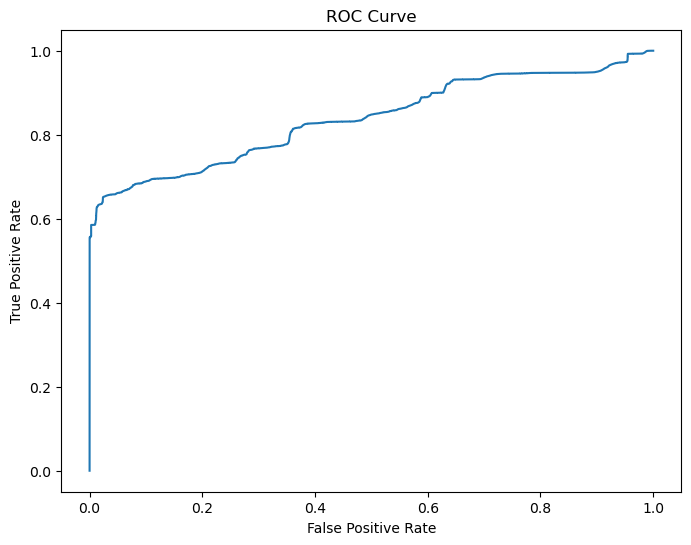

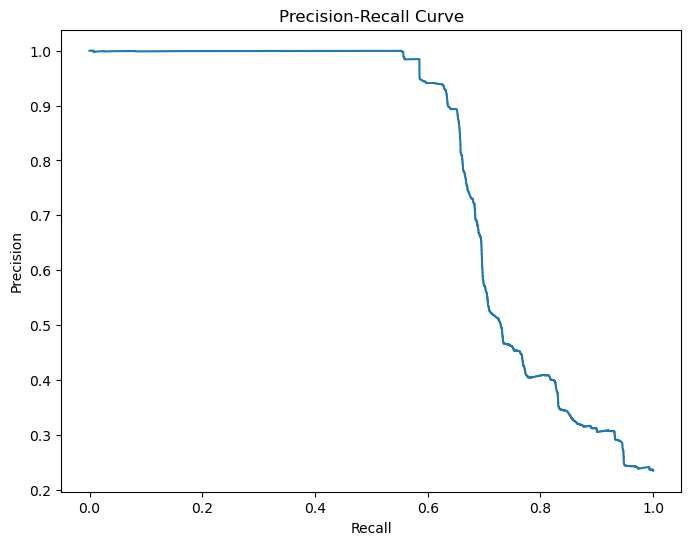

In [53]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test, test_mae_loss)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, test_mae_loss)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [54]:
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_threshold_idx]

print(f"Best threshold by F1 score: {best_threshold:.4f}")


Best threshold by F1 score: 0.2240


In [55]:
anomalies = test_mae_loss > best_threshold
y_pred = np.zeros_like(y_test)
try:
    y_pred[anomalies] = 1
except IndexError as e:
    print("IndexError:", e)

In [56]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")



Confusion Matrix:
[[170822   4213]
 [ 18683  34965]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94    175035
         1.0       0.89      0.65      0.75     53648

    accuracy                           0.90    228683
   macro avg       0.90      0.81      0.85    228683
weighted avg       0.90      0.90      0.89    228683

Accuracy: 0.8999
Precision: 0.8925
Recall: 0.6517
F1 Score: 0.7533
AUC-ROC: 0.8138
